<a href="https://colab.research.google.com/github/castynyaga/Statistics-IP/blob/main/Statistics_IP_Casty_Nyaga.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **1. Defining the question**




**a) Specifying the question**

How to predict which individuals are most likely to have or use a bank account?

**b) Defining the Metric for Success**

**c)Understanding the context**


**d) Recording the Experimental Design**

**e) Data Relevance/appropriateness of the available data**



# **2. Reading the Data**

In [2]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
# Loading data from the datase provided
# Data link: https://bit.ly/FinancialDataset
df = pd.read_csv('https://bit.ly/FinancialDataset')
# previewing
df

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed


In [4]:
# Loading variable defination data and and previewing 
# # Data link: https://bit.ly/VariableDefinitions
Variables = pd.read_csv('https://bit.ly/VariableDefinitions')
# previewing
Variables

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


# 3. Checking the Data

In [5]:
# Determining the no. of records in our dataset
df.shape

(23524, 13)

In [6]:
# Previewing the top of our dataset
df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [7]:
# Previewing the bottom of our dataset
df.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [8]:
# Checking whether each column has an appropriate datatype
df.info()
# household_size & Respondent Age datatype should be changed to intenger after data clean up. Changing before addressing null values will result to an error.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


# 4. Data Cleaning

In [9]:
# Checking for number of missing data
df.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [10]:
# the proportion of data that is missing
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing

country                   0.059514
year                      0.000000
uniqueid                  0.000000
Has a Bank account        0.153035
Type of Location          0.063765
Cell Phone Access         0.046761
household_size            0.119027
Respondent Age            0.144533
gender_of_respondent      0.144533
The relathip with head    0.017004
marital_status            0.136031
Level of Educuation       0.123278
Type of Job               0.127529
dtype: float64

In [11]:
# our research problem is on prediction of individuals most likely to have or use a bank a bank account. The variable with the highest proportion of missing data from result above is our key focus 
# The prediction will be dependent on other the relationship with other variable of which most of them are categorical and percentage of missing data is not big 
# We will therefore drop the all the null values
df.dropna( axis=0, inplace=True)

In [12]:
# confirming missing values have been dropped
df.isnull().sum()

country                   0
year                      0
uniqueid                  0
Has a Bank account        0
Type of Location          0
Cell Phone Access         0
household_size            0
Respondent Age            0
gender_of_respondent      0
The relathip with head    0
marital_status            0
Level of Educuation       0
Type of Job               0
dtype: int64

In [13]:
# Checking for duplicate values
df.duplicated().sum()
# There are no duplicated values

0

In [14]:
# changing datatypes of  columns  6-household_size to integer and 7- Respondent Age to integer 
df =df.astype({'household_size':'int64', 'Respondent Age': 'int64'})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23343 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23343 non-null  object
 1   year                    23343 non-null  int64 
 2   uniqueid                23343 non-null  object
 3   Has a Bank account      23343 non-null  object
 4   Type of Location        23343 non-null  object
 5   Cell Phone Access       23343 non-null  object
 6   household_size          23343 non-null  int64 
 7   Respondent Age          23343 non-null  int64 
 8   gender_of_respondent    23343 non-null  object
 9   The relathip with head  23343 non-null  object
 10  marital_status          23343 non-null  object
 11  Level of Educuation     23343 non-null  object
 12  Type of Job             23343 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.5+ MB


In [15]:
# checking for unique values
# checking for the year- variable
df['year'].unique()

array([2018, 2029, 2056, 2016, 2039, 2017])

In [16]:
# Our research is focused on year 2016 to 2018 therfore we will drop the rest
df.drop(df[df['year']>2018].index,inplace = True)

In [17]:
# confirming the unique values on year variable
df['year'].unique()

array([2018, 2016, 2017])

In [18]:
# checking for the Level of Educuation- variable
df['Level of Educuation'].unique()


array(['Secondary education', 'No formal education',
       'Vocational/Specialised training', 'Primary education',
       'Tertiary education', 'Other/Dont know/RTA', '6'], dtype=object)

In [19]:
# From our variable defination '6' is not one of the defined responses, therefore it should be dropped
df.drop(df[df['Level of Educuation']=='6'].index,inplace = True)

In [20]:
# confirming it has been dropped
# checking for the Level of Educuation- variable
df['Level of Educuation'].unique()

array(['Secondary education', 'No formal education',
       'Vocational/Specialised training', 'Primary education',
       'Tertiary education', 'Other/Dont know/RTA'], dtype=object)

In [21]:
# Error in spelling and values
print(df.columns)

Index(['country', 'year', 'uniqueid', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')


In [22]:
# The relathip with head & Level of Educuation are misspelt.
# Correcting the spelling errors
df. rename(columns ={'The relathip with head' : 'The relationship with head','Level of Educuation' : 'Level of Education'  }, inplace = True) 


In [23]:
# Confirming correction of spelling errors of variables
print(df.columns)

Index(['country', 'year', 'uniqueid', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relationship with head', 'marital_status',
       'Level of Education', 'Type of Job'],
      dtype='object')


<function matplotlib.pyplot.show>

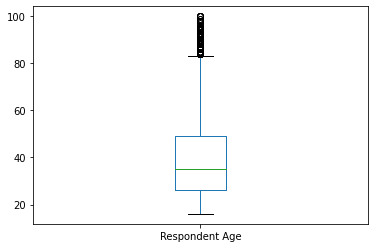

In [24]:
#checking for outliers in the Age column
df.boxplot(column=['Respondent Age'], grid = False)
plt.show

In [25]:
# The box plot shows outliers of individuals above the age of 80year, however we are not going to drop them because from the result below 
# only 335 individuals are above 80years and age is not a limitation to the likelihood of one having or using a bank account and we also want to find out 
# if it affects having or using a bank account
df[df['Respondent Age']>80].value_counts().sum()

335

<function matplotlib.pyplot.show>

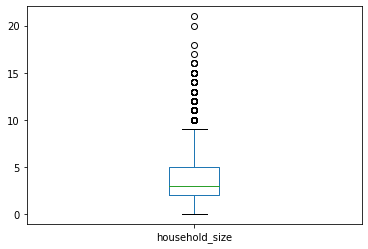

In [26]:
#checking for outliers on household variable
df.boxplot(column=['household_size'], grid = False)
plt.show
# There are some outliers but were are goig to keep them in order to find out if they have an effect to our research problem

# 5. Univariate, Bivariate and Multivariate analysis

In [27]:
# checking for measures of central tendency that is the mean, mode and median and 
# mearsure of dispersion i.e Variance,Standard deviation, Range and Quartile deviation. NOTE: Median = 50 percentile
df.describe()

,year,household_size,Respondent Age
count,23313.000000,23313.000000,23313.000000
mean,2016.977952,3.688414,38.793549
std,0.849034,2.280842,16.510611
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


In [29]:
df2=df.drop(['year','Type of Location','household_size','Respondent Age','The relationship with head','marital_status','Level of Education','Type of Job'],axis=1)
Table=df2.groupby(by=['country','gender_of_respondent','Has a Bank account','Cell Phone Access']).agg('count')
Table
#The table shows the number of people by gender and country that have access to bank accounts 

uniqueid
country  gender_of_respondent Has a Bank account Cell Phone Access          
Kenya    Female               No                 No                      778
                                                 Yes                    2002
                              Yes                No                       33
                                                 Yes                     667
         Male                 No                 No                      443
                                                 Yes                    1320
                              Yes                No                       29
                                                 Yes                     790
Rwanda   Female               No                 No                      995
                                                 Yes                    3723
                              Yes                No                        6
                                                 Yes                     435
         Male                 No                 No                      454
                                                 Yes                    2500
                              Yes                No                       13
                                                 Yes                     539
Tanzania Female               No                 No                     1778
                                                 Yes                    1714
                              Yes                No                        6
                                                 Yes                     233
         Male                 No                 No                      821
                                                 Yes                    1586
                              Yes                No                        7
                                                 Yes                     352
Uganda   Female               No                 No                      447
                                                 Yes                     834
                              Yes                No                        6
                                                 Yes                      91
         Male                 No                 No                      178
                                                 Yes                     449
                              Yes                No                        4
                                                 Yes                      80

In [ ]:
# Ploting histogram for Respondent Age
x=[df['Respondent Age']]
plt.hist(x,bins=10,rwidth=0.9)
plt.show()
# The majority of respondents from our dataset are between 20 - 40 years old, the maximum age is 100 and minimum of 16 years old
# This is a positive skewed histogram which means that more of the data on the left-hand side of the distribution, with a few large values to the right.
# it also implies that the mean is greater than the median

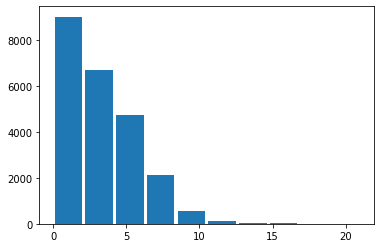

In [51]:
# Ploting histogram for Respondent Age
x=[df['household_size']]
plt.hist(x,bins=10,rwidth=0.9)
plt.show()
# it is not normally distributed and the most common number of people living in the house is 2 - 5. 
# This is also a positive skewed histogram which means more households have fewer number of people living in one house,
# with a few households having large number of people living in one house.
# it also implies that the mean is greater than the median

In [52]:
df['Has a Bank account'].value_counts()*100/len(df)

No     85.883413
Yes    14.116587
Name: Has a Bank account, dtype: float64

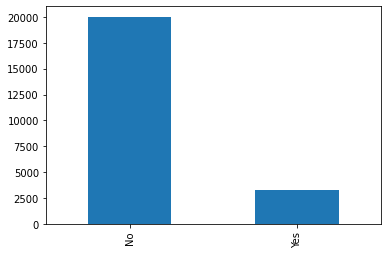

In [59]:
# Bar graph visualizing  the number of people with bank accounts against those without
df['Has a Bank account'].value_counts().head(10).plot.bar()
# From the count graph, more respondent have No bank_account
# From our data 85% of the people who reponded to the people who participated in the survey did not have bank accounts

Text(0.5, 1.0, 'Country of Respondent Distribution')

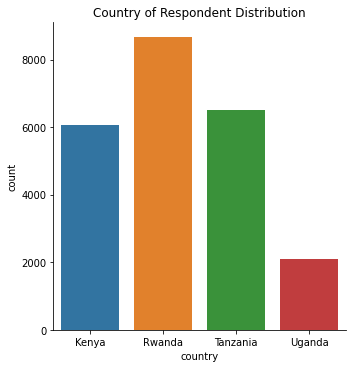

In [97]:
# Plotting country of respondents using count

sns.catplot(x="country", kind="count", data=df)
plt.title("Country of Respondent Distribution")
# Most of Respondents were comming from Rwanda(9000), followed with Tanzania(7000) and few from Uganda(2000)

Text(0.5, 1.0, 'Location Distribution')

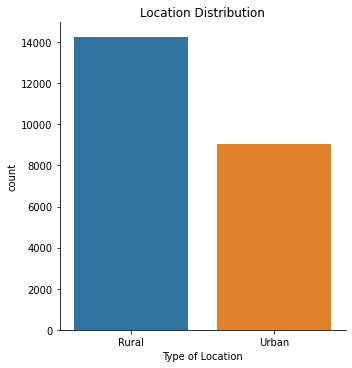

In [105]:
# location_type of respondents using count
sns.catplot(x="Type of Location", kind="count", data=df)
plt.title("Location Distribution")


Text(0.5, 1.0, 'Cellphone Acess Distribution')

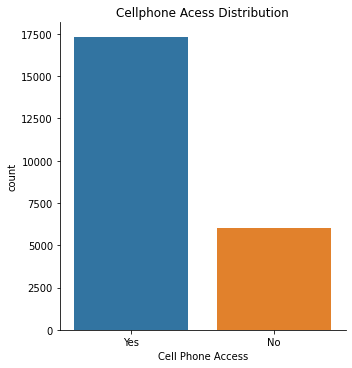

In [104]:
sns.catplot(x="Cell Phone Access", kind="count", data=df)
plt.title("Cellphone Acess Distribution")
# most of respondents they do posses cellphones and 6000 of all repondents they don't possess cellphones

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

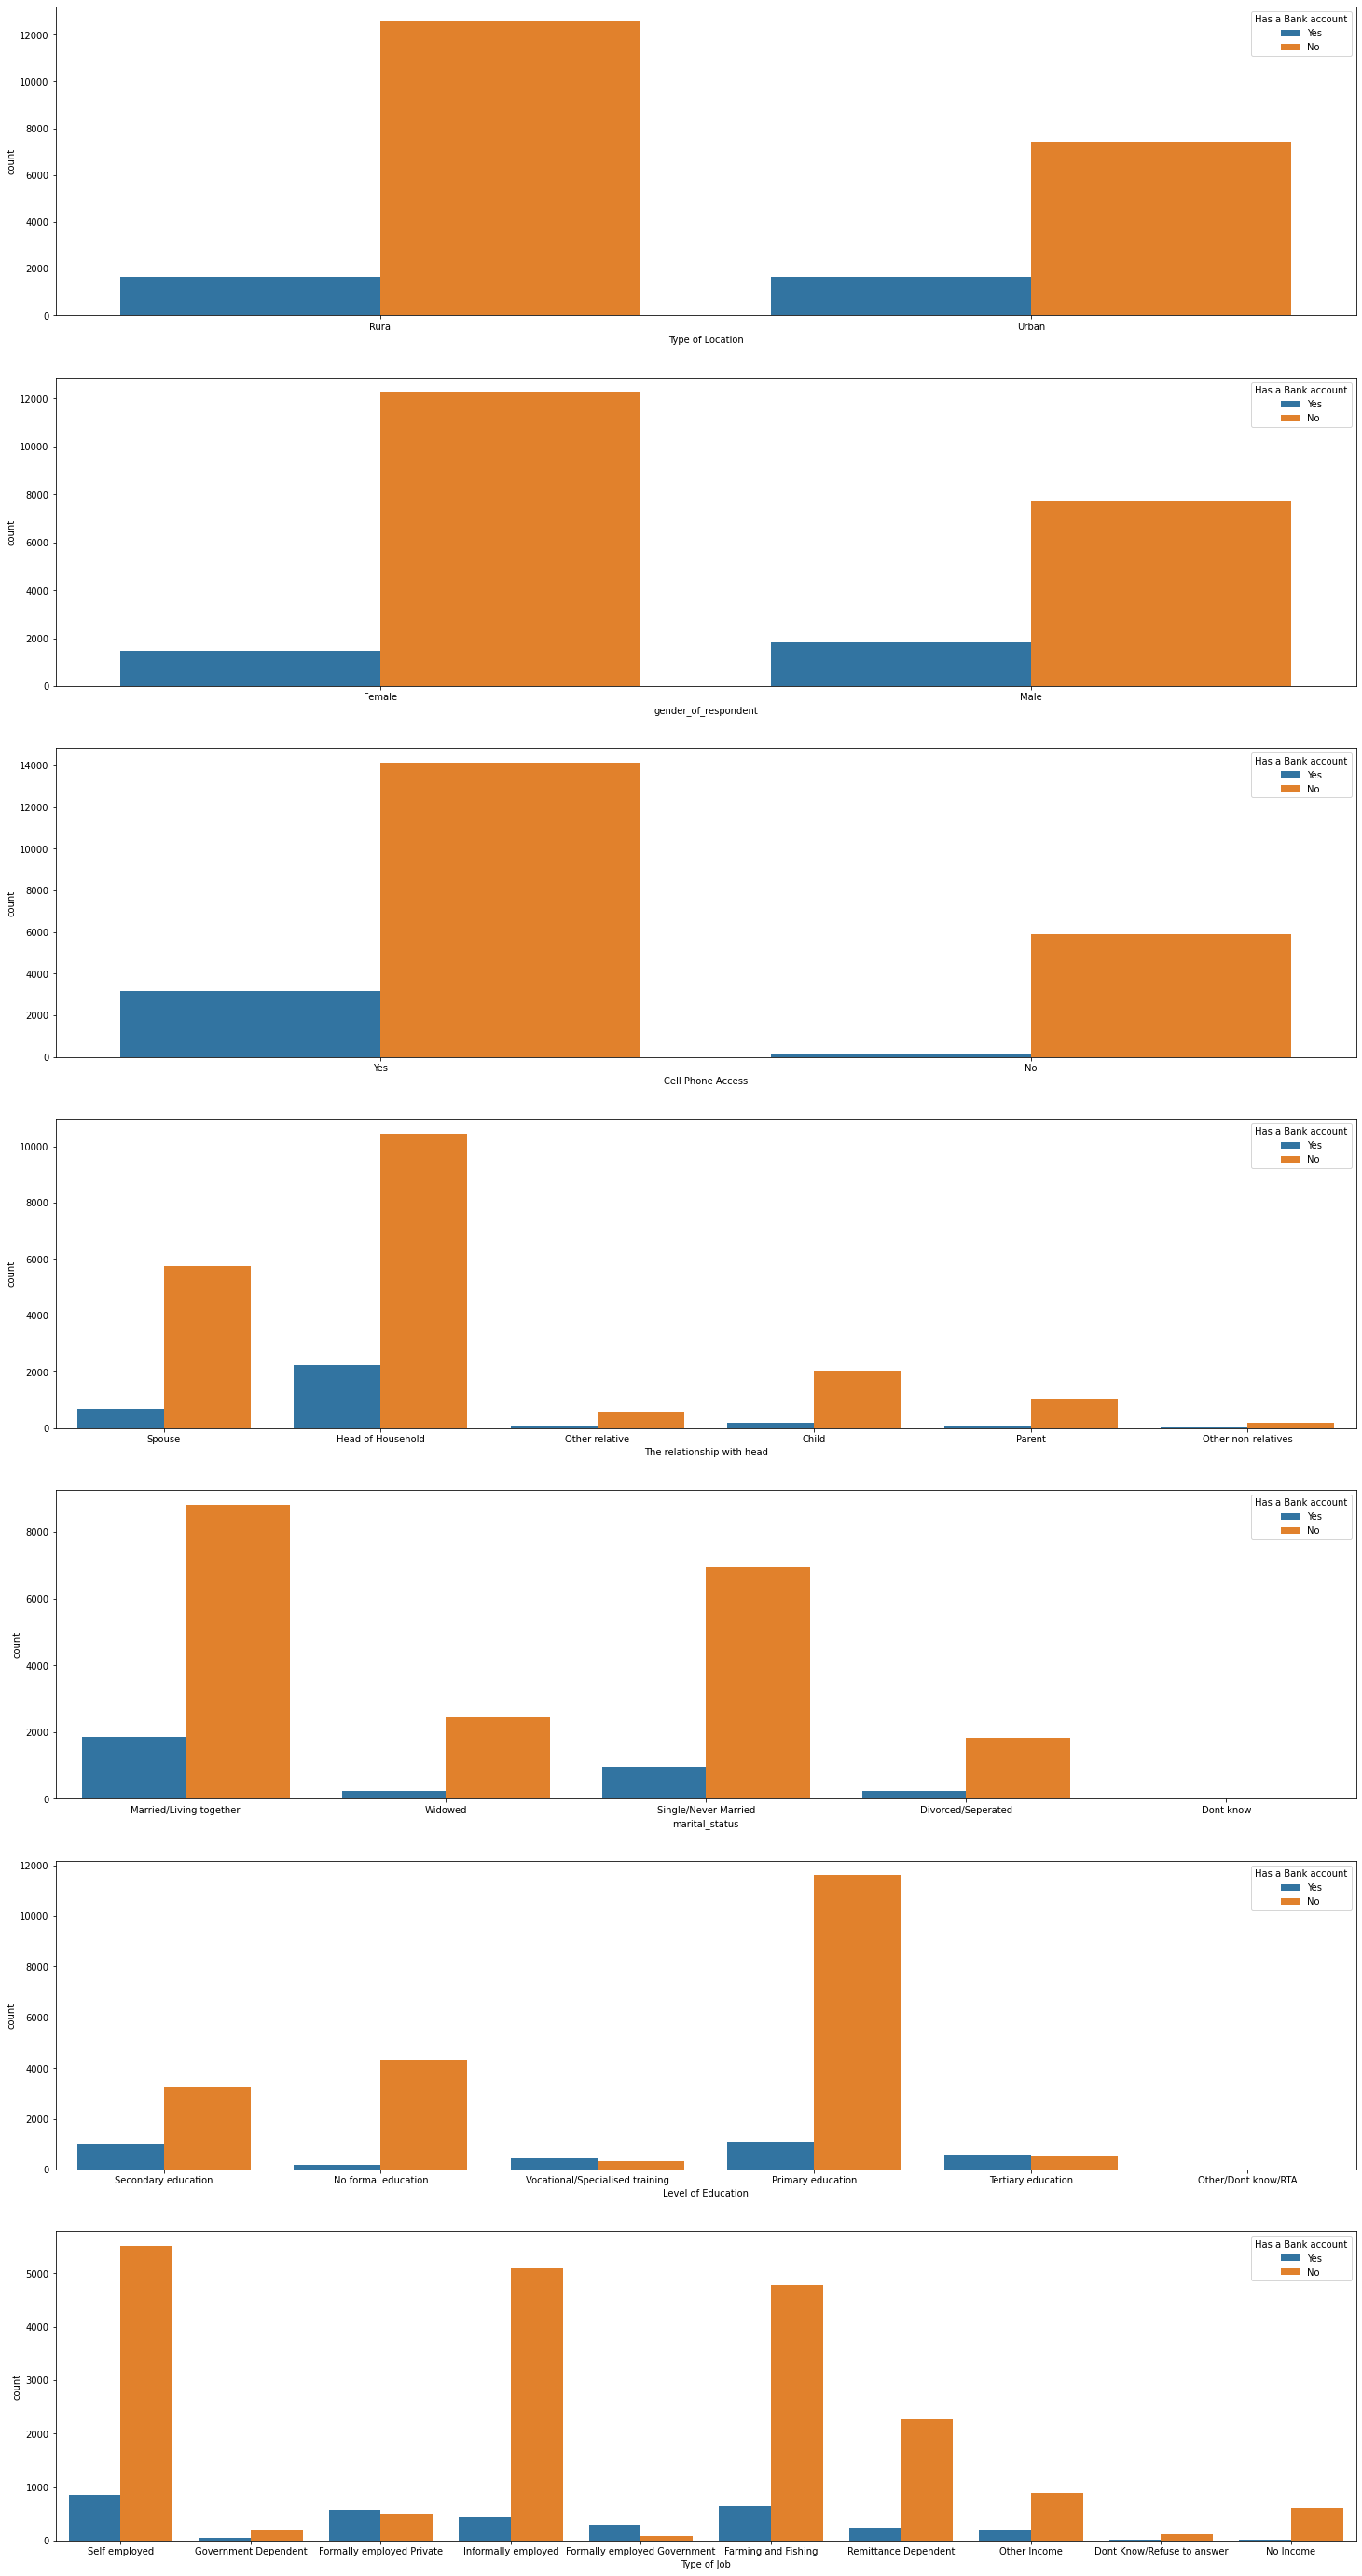

In [96]:
# Visualizing all variables against having a bank account
import seaborn as sns

f, axes = plt.subplots(7, 1, figsize=[25, 50])

sns.countplot('Type of Location', hue= 'Has a Bank account', data=df, ax=axes[0])
sns.countplot('gender_of_respondent', hue= 'Has a Bank account', data=df, ax=axes[1])
sns.countplot('Cell Phone Access', hue= 'Has a Bank account', data=df, ax=axes[2])
sns.countplot('The relationship with head', hue= 'Has a Bank account', data=df, ax=axes[3])
sns.countplot('marital_status', hue= 'Has a Bank account', data=df, ax=axes[4])
sns.countplot('Level of Education', hue= 'Has a Bank account', data=df, ax=axes[5])
sns.countplot('Type of Job', hue= 'Has a Bank account', data=df, ax=axes[6])

In [ ]:
# From the graphs above the following we realize the following
# 1. Individuals from urban locations are more likely to have a bank account compared to those in rural locations
# 2. More male individuals had bank accounts compared to Females
# 3. Individuals with cell phones had banks accounts compared to those without
# 4. The gap between individuals with and those without bank accounts increase significantly as the relationship with the head weakens.
# 5. Married/living together and single/Married contributed significatly to number of individuals with accounts
# 6. The gap between individuals with and those without bank accounts reduce significantly as the level of education increases.
# 7. All forms of employment contibuted significantly to number of individuals with bank accounts compared to other types of jobs

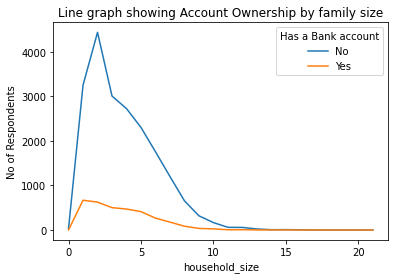

In [64]:
#Plotting line graph of household size against has bank account to check their relationship
pd.crosstab(df['household_size'], df['Has a Bank account']).plot(kind='line')
plt.title("Line graph showing Account Ownership by family size")
plt.ylabel("No of Respondents")
plt.show()
# The graph shows that households with small size are more likely to have or use a bank account

Text(0, 0.5, 'No of Respondents')

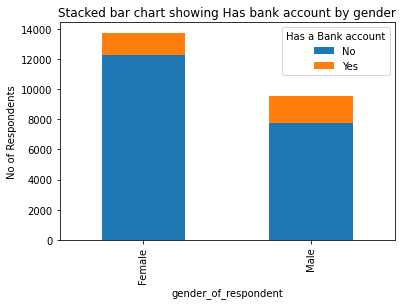

In [60]:
# bar chart showing individual with bank accounts  by gender
pd.crosstab(df['gender_of_respondent'], df['Has a Bank account']).plot(kind='bar', stacked=True)
plt.title("Stacked bar chart showing Has bank account by gender")
plt.ylabel("No of Respondents")
# There were more female respondents than Male but More ale individual are more likely to have or use a bank account compared to female

Text(0, 0.5, 'No of Respondents')

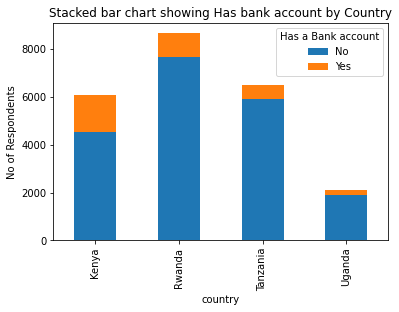

In [61]:
# stacked barchart showing individuals with  bank accounts per country Kenya has highest number while Ugander has the lowest
pd.crosstab(df['country'], df['Has a Bank account']).plot(kind='bar', stacked=True)
plt.title("Stacked bar chart showing Has bank account by Country")
plt.ylabel("No of Respondents")
# Kenya has the highest number of individuals with bank accounts while Uganda registered the least.

# INSIGHTS AND RECOMMENDATIONS ON FINANCIAL INCLUSION 
1. 

# HYPOTHESIS TESTING

# **Defining the Question**


# a) Specifying the Data Analytic Question
How can we predict which when most Blue cars are taken

# **b) Defining the Metric for Success**


Provide an indication of when most blue cars are taken 

# **c) Understanding the context**



Financial Inclusion remains one of the main obstacles to economic and human development in Africa. Access to bank accounts has been regarded as an indicator of financial inclusion.This is the premise of this analyis, to investigate and provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda

# d) Recording the Experimental Design


1. Defining the research question

2. Finding and dealing with outliers, anomalies, and missing data within the dataset.

3. Plot appropriate univariate and bivariate summaries recording our observations.

4. Implement the solution by performing hypothesis testing.

5. Challenge your solution by providing insights on how you can make improvements. Defining the research question

# **e) Data Relevance**


Double-click (or enter) to edit

# **Reading the data**

In [30]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from statsmodels.stats import weightstats as stests


In [80]:
df1=pd.read_csv('https://bit.ly/DSCoreAutolibDataset')
df1.head(10)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20
5,75001,1/6/2018,1437,5,weekend,187,185,6,6,7,8,38,35
6,75001,1/7/2018,1440,6,weekend,180,180,2,2,10,9,34,34
7,75001,1/8/2018,1438,0,weekday,84,83,3,3,10,10,14,15
8,75001,1/9/2018,1439,1,weekday,81,84,1,1,4,4,15,15
9,75001,1/10/2018,1440,2,weekday,88,85,5,5,11,11,23,22


In [81]:
# checking the bottom data
df1.tail(10)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16075,95880,6/10/2018,1440,6,weekend,34,32,0,0,1,0,0,0
16076,95880,6/11/2018,1440,0,weekday,17,18,0,0,0,0,0,0
16077,95880,6/12/2018,1439,1,weekday,25,25,0,0,0,0,0,0
16078,95880,6/13/2018,1440,2,weekday,12,13,0,0,1,1,0,0
16079,95880,6/14/2018,1439,3,weekday,15,13,0,0,0,0,0,0
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [82]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [83]:
# checking the shape of the dataset
df1.shape

(16085, 13)

In [84]:
# checking for unique values
df1['Postal code'].unique()

array([75001, 75002, 75003, 75004, 75005, 75006, 75007, 75008, 75009,
       75010, 75011, 75012, 75013, 75014, 75015, 75016, 75017, 75018,
       75019, 75020, 75112, 75116, 78000, 78140, 78150, 91330, 91370,
       91400, 92000, 92100, 92110, 92120, 92130, 92140, 92150, 92160,
       92170, 92190, 92200, 92210, 92220, 92230, 92240, 92250, 92260,
       92270, 92290, 92300, 92310, 92320, 92330, 92340, 92350, 92360,
       92370, 92380, 92390, 92400, 92410, 92420, 92500, 92600, 92700,
       92800, 93100, 93110, 93130, 93150, 93170, 93200, 93230, 93260,
       93300, 93310, 93350, 93360, 93370, 93390, 93400, 93440, 93500,
       93600, 93700, 93800, 94000, 94100, 94110, 94120, 94130, 94140,
       94150, 94160, 94220, 94230, 94300, 94340, 94410, 94450, 94500,
       94700, 94800, 95100, 95870, 95880])

# **Data Cleaning**

In [85]:
# Checking for missing values
df1.isnull().sum()
# The data has no missing values

Postal code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

In [86]:
# Checking for duplicated values
df1.duplicated().sum()
# The dataset  has no duplicated values


0

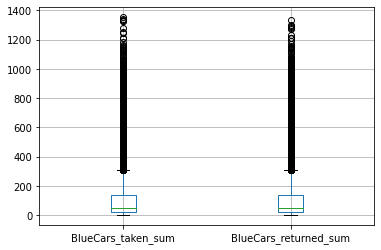

In [87]:
# Using box plot to check for out 
df1.boxplot(['BlueCars_taken_sum','BlueCars_returned_sum'])

In [88]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


# **Exploratory Analysis**

In [89]:
df1.describe()

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'distribution of blue cars taken')

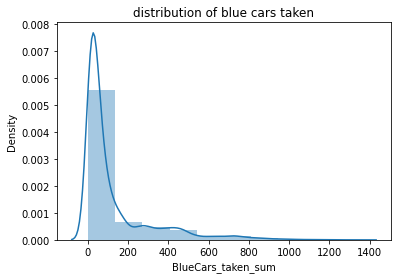

In [90]:
#checking for the normality.Plot bluecars taken
sns.distplot(df1['BlueCars_taken_sum'], bins=10)
plt.title('distribution of blue cars taken')
# This is a positive skewed histogram which means that more of the data on the left-hand side of the distribution, with a few large values to the right.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'distribution of blue cars returned')

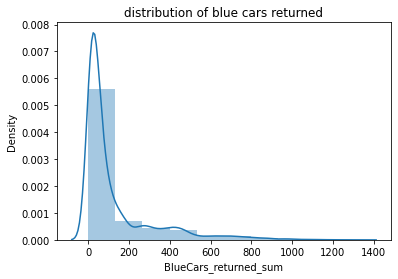

In [91]:
#checking for the normality.Plot bluecars returned
sns.distplot(df1['BlueCars_returned_sum'], bins=10)
plt.title('distribution of blue cars returned')

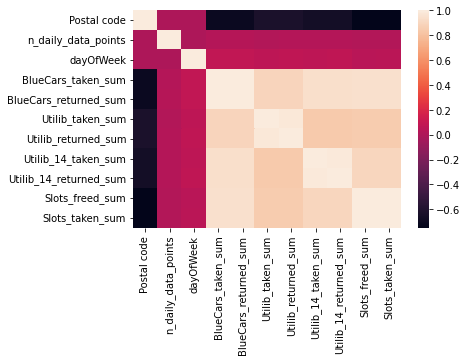

In [92]:
#correlation heatmap for the data 
sns.heatmap(df1.corr())
#The heatmap shows that apart from n_daily_data_points, the other variable are highly correlated

In [93]:
# Dropping columns that we will not be using
df4=df1.drop(['Utilib_taken_sum','Utilib_returned_sum','Utilib_14_taken_sum','Utilib_14_returned_sum','Slots_freed_sum','Slots_taken_sum'],axis=1)

In [94]:
# checking for measures of central tendency that is the mean, mode and median and 
# measure of dispersion i.e Variance,Standard deviation, Range and Quartile deviation. NOTE: Median = 50 percentile
df4.describe()

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714
std,7647.342000,33.212050,2.008378,185.426579,185.501535
min,75001.000000,1174.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000


# Sampling

In [95]:
#Using stratified sampling
df5 = df4.groupby('dayOfWeek', group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.1))
df5

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum
13069,94000,4/16/2018,1440,0,weekday,88,86
1031,75007,4/9/2018,1440,0,weekday,260,250
3838,78150,4/9/2018,1440,0,weekday,56,55
7839,92330,2/12/2018,1440,0,weekday,25,31
2251,75015,3/12/2018,1440,0,weekday,764,734
...,...,...,...,...,...,...,...
3133,75112,1/14/2018,1440,6,weekend,5,4
8059,92340,4/22/2018,1440,6,weekend,33,31
12063,93400,1/28/2018,1440,6,weekend,118,122
15190,94500,2/11/2018,1440,6,weekend,32,28


In [67]:
# Calculating Population mean for blue cars taken
popmeanBt = df1['BlueCars_taken_sum'].mean()
popmeanBt

125.92695057506994

In [68]:
# calculating mean for bluecars returned
popmeanBr = df1['BlueCars_returned_sum'].mean()
popmeanBr

125.912713708424

In [96]:
# sample mean for blue cars taken
samplemeanBt = df5['BlueCars_taken_sum'].mean()
samplemeanBt

131.52798507462686

In [97]:
# sample mean for blue cars taken
samplemeanBr = df5['BlueCars_returned_sum'].mean()
samplemeanBr

131.97823383084577

In [ ]:
# calculating sample standard deviation
c = df4['bluecars_taken_sum'].std()
c